In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Insurance Premium Data

##Data

https://www.kaggle.com/datasets/schran/insurance-premium-prediction?resource=download

In [248]:
df = pd.read_csv('Dataset Path')

In [249]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


In [250]:
df.shape

(278860, 20)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [252]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,274175.000000,264905.000000,250974.000000,268263.000000,197572.000000,278860.000000,250974.000000,278860.000000,277019.000000
mean,41.020771,42089.085329,1.998048,28.584290,0.998117,9.520283,574.362049,5.007764,966.118667
std,13.549683,35444.517255,1.412312,15.966208,1.000795,5.767915,158.792037,2.581349,909.404567
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13588.000000,1.000000,16.149890,0.000000,5.000000,437.000000,3.000000,286.000000
50%,41.000000,32191.000000,2.000000,26.451244,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,62164.000000,3.000000,38.966369,2.000000,15.000000,712.000000,7.000000,1367.000000
max,64.000000,149997.000000,4.000000,93.876090,9.000000,19.000000,849.000000,9.000000,4999.000000


In [253]:
df.isnull().sum().sum()

np.int64(272794)

In [254]:
df.duplicated().sum()

np.int64(0)

##Incorrect Data Types

###Date

In [255]:
df['Policy Start Date'].head(10)

,Policy Start Date
0,2022-12-10 15:21:39.078837
1,2023-01-31 15:21:39.078837
2,2023-11-26 15:21:39.078837
3,2023-02-27 15:21:39.078837
4,2020-11-25 15:21:39.078837
5,2020-09-16 15:21:39.078837
6,2021-03-29 15:21:39.078837
7,2022-12-21 15:21:39.078837
8,2023-05-03 15:21:39.078837
9,2023-07-27 15:21:39.078837


Policy Start Date →  Extract: Year, Month
                  →  Drop the original date column
                  →  Use the extracted features

In [256]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy Year'] = df['Policy Start Date'].dt.year
df['Policy Month'] = df['Policy Start Date'].dt.month

df = df.drop('Policy Start Date', axis = 1)

In [257]:
df.shape

(278860, 21)

##Handling Missing Values

NUMERICAL
-----------
Data Type
Normal distribution (bell curve)--> Mean or Median
Skewed distribution (outliers)--> Median

CATEGORICAL
-----------
Data Type
Categories --> Mode (most frequent)


In [258]:
df.isnull().sum()

,0
Age,4685
Gender,0
Annual Income,13955
Marital Status,5019
Number of Dependents,27886
Education Level,0
Occupation,81288
Health Score,10597
Location,0
Policy Type,0


###Premium Amount

In [259]:
df['Premium Amount'].isnull().sum() #This is the target

np.int64(1841)

In [260]:
# Compare rows WITH vs WITHOUT Premium Amount
# Create a flag for missing premium
df['Premium_Missing'] = df['Premium Amount'].isnull()


# Check if missing premiums correlate with other features
df.groupby('Premium_Missing').mean(numeric_only=True)

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Year,Policy Month
Premium_Missing,,,,,,,,,,,
False,41.020139,42095.013159,1.998267,28.583739,0.998105,9.519318,574.389365,5.007898,966.118667,2021.626416,6.511860
True,41.115766,41190.976396,1.964720,28.667293,1.000000,9.665399,570.247130,4.987507,NaN,2021.658338,6.418251


- People with missing premiums look the same as people with premiums
- There's no suspicious pattern
- Safe to drop these rows

In [261]:
df = df.drop("Premium_Missing", axis = 1) # Remove the flag column we created
df = df.dropna(subset = ['Premium Amount']) # Drop rows with missing Premium Amount
df.shape

(277019, 21)

In [262]:
df['Premium Amount'].isnull().sum()

np.int64(0)

In [263]:
df.isnull().sum()

,0
Age,4658
Gender,0
Annual Income,13851
Marital Status,4991
Number of Dependents,27689
Education Level,0
Occupation,80748
Health Score,10525
Location,0
Policy Type,0


###Occupation

In [264]:
df["Occupation"].unique()

array([nan, 'Self-Employed', 'Employed', 'Unemployed'], dtype=object)

In [265]:
df['Occupation'].value_counts(dropna=False)

,count
Occupation,
NaN,80748
Self-Employed,65479
Employed,65459
Unemployed,65333


- Balanced categories (Self-Employed, Employed, Unemployed are roughly equal 65k each)
-29% missing
- The non-missing categories are perfectly balanced (suspicious?)

In [266]:
# Compare Premium Amount: Missing vs Non-Missing Occupation
df.groupby(df['Occupation'].isnull())['Premium Amount'].mean()

,Premium Amount
Occupation,
False,966.363497
True,965.523567


No significant pattern, difference is less than 0.1%
- Fill with "Unknown"
- Decision Tree can learn if "Unknown" matters

In [267]:
df['Occupation'].fillna('Unknown', inplace = True)
df['Occupation'].isnull().sum()

/tmp/ipython-input-3581315891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Occupation'].fillna('Unknown', inplace = True)


np.int64(0)

In [268]:
df.isnull().sum()

,0
Age,4658
Gender,0
Annual Income,13851
Marital Status,4991
Number of Dependents,27689
Education Level,0
Occupation,0
Health Score,10525
Location,0
Policy Type,0


###Previous Claims

In [269]:
df['Previous Claims'].isnull().sum()

np.int64(80749)

In [270]:
df['Previous Claims'].describe()

,Previous Claims
count,196270.000000
mean,0.998105
std,1.000770
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,9.000000


In [271]:
df.groupby(df['Previous Claims'].isnull())['Premium Amount'].mean()

,Premium Amount
Previous Claims,
False,965.934096
True,966.567289


No significant pattern, difference is only 0.63%
- Fill with median = 1.0 (middle value)
- Less affected bu outliers (max = 9)

In [272]:
df['Previous Claims'] = df['Previous Claims'].fillna(df['Previous Claims'].median())
df['Previous Claims'].isnull().sum()

np.int64(0)

In [273]:
df.isnull().sum()

,0
Age,4658
Gender,0
Annual Income,13851
Marital Status,4991
Number of Dependents,27689
Education Level,0
Occupation,0
Health Score,10525
Location,0
Policy Type,0


###Credit Score

In [274]:
df['Credit Score'].describe()

,Credit Score
count,249319.000000
mean,574.389365
std,158.794989
min,300.000000
25%,437.000000
50%,575.000000
75%,712.000000
max,849.000000


In [275]:
df.groupby(df['Credit Score'].isnull())['Premium Amount'].mean()

,Premium Amount
Credit Score,
False,966.137483
True,965.949314


In [276]:
# Numerical features
numerical_comparison = df.groupby(df['Credit Score'].isnull())[
    ['Age', 'Annual Income', 'Health Score', 'Previous Claims',
     'Vehicle Age', 'Insurance Duration', 'Premium Amount']
].mean()

print(numerical_comparison)

                    Age  Annual Income  Health Score  Previous Claims  \
Credit Score                                                            
False         41.016569   42132.951424     28.578807         0.999222   
True          41.052242   41753.917315     28.628219         0.993574   

              Vehicle Age  Insurance Duration  Premium Amount  
Credit Score                                                   
False            9.520458            5.008860      966.137483  
True             9.509061            4.999242      965.949314  


People with missing Credit Score are identical to people with credit score

(In real life missing credit score would definitely have a pattern)

"This is a Synthetic dataset created for educational purposes"

In [277]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
df['Credit Score'].isnull().sum()

np.int64(0)

In [278]:
df.isnull().sum()

,0
Age,4658
Gender,0
Annual Income,13851
Marital Status,4991
Number of Dependents,27689
Education Level,0
Occupation,0
Health Score,10525
Location,0
Policy Type,0


###Think about rows (extra)

In [279]:
# Count missing values per row
missing_per_row = df.isnull().sum(axis=1)

# See the distribution
print("Missing values per row distribution:")
print(missing_per_row.value_counts().sort_index())

Missing values per row distribution:
0    205586
1     63380
2      7586
3       449
4        17
5         1
Name: count, dtype: int64


Drop rows with 4+ missing values (18 rows)
%19 + features missing


In [280]:
rows_before = len(df)

In [281]:
df = df[df.isnull().sum(axis=1) < 4]
rows_after = len(df)

In [282]:
rows_before

277019

In [283]:
rows_after

277001

In [284]:
df.isnull().sum()

,0
Age,4652
Gender,0
Annual Income,13837
Marital Status,4979
Number of Dependents,27673
Education Level,0
Occupation,0
Health Score,10515
Location,0
Policy Type,0


###Number of Dependents

In [285]:
# Check Number of Dependents unique values
df['Number of Dependents'].value_counts().sort_index()

,count
Number of Dependents,
0.0,49791
1.0,49949
2.0,50034
3.0,50007
4.0,49547


In [286]:
# Fill Number of Dependents with median
df['Number of Dependents'] = df['Number of Dependents'].fillna(df['Number of Dependents'].median())

df['Number of Dependents'].isnull().sum()

np.int64(0)

###Annual Income

In [287]:
df.groupby(df['Annual Income'].isnull())['Premium Amount'].mean()

,Premium Amount
Annual Income,
False,966.229860
True,964.340898


In [288]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
df['Annual Income'].isnull().sum()

np.int64(0)

In [289]:
# Compare mean vs median for Annual Income
print(f"Mean: {df['Annual Income'].mean():.2f}")
print(f"Median: {df['Annual Income'].median():.2f}")
print(f"Difference: {df['Annual Income'].mean() - df['Annual Income'].median():.2f}")

Mean: 41601.46
Median: 32207.00
Difference: 9394.46


This confirms skewness (mean is much higher than median)

###Health Score

In [290]:
df.groupby(df['Health Score'].isnull())['Premium Amount'].mean()

,Premium Amount
Health Score,
False,966.943911
True,945.647646


Is 2.2% significant enough (i think its not)

In [291]:
# Compare mean vs median for Annual Income
print(f"Mean: {df['Health Score'].mean():.2f}")
print(f"Median: {df['Health Score'].median():.2f}")
print(f"Difference: {df['Health Score'].mean() - df['Health Score'].median():.2f}")

Mean: 28.58
Median: 26.45
Difference: 2.14


In [292]:
df['Health Score'] = df['Health Score'].fillna(df['Health Score'].median())
df['Health Score'].isnull().sum()

np.int64(0)

###Martial Status

In [295]:
df['Marital Status'].value_counts(dropna=False) #Check the distribution

,count
Marital Status,
Single,90890
Married,90658
Divorced,90474
NaN,4979


In [294]:
df.groupby(df['Marital Status'].isnull())['Premium Amount'].mean()

,Premium Amount
Marital Status,
False,965.812320
True,983.792127


In [296]:
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0]) #Single category is most frequent

In [297]:
df['Marital Status'].isnull().sum()

np.int64(0)

In [298]:
df.isnull().sum()

,0
Age,4652
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


###Age

In [299]:
df['Age'].value_counts(dropna=False) #Check the distribution

,count
Age,
55.0,5961
33.0,5937
53.0,5922
45.0,5908
61.0,5889
40.0,5888
34.0,5881
22.0,5877
43.0,5870


In [300]:
print(f"Mean: {df['Health Score'].mean():.2f}")
print(f"Median: {df['Health Score'].median():.2f}")
print(f"Difference: {df['Health Score'].mean() - df['Health Score'].median():.2f}")

Mean: 28.50
Median: 26.45
Difference: 2.05


In [302]:
print(f"Mean Age: {df['Age'].mean():.2f}")
print(f"Median Age: {df['Age'].median():.2f}")
print(f"Min Age: {df['Age'].min():.2f}")
print(f"Max Age: {df['Age'].max():.2f}")

Mean Age: 41.02
Median Age: 41.00
Min Age: 18.00
Max Age: 64.00


In [303]:
comparison = df.groupby(df['Age'].isnull())[
    ['Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']
].mean()

print("Comparison: Missing Age vs Has Age")
print(comparison)

Comparison: Missing Age vs Has Age
       Annual Income  Health Score  Credit Score  Premium Amount
Age                                                             
False   41604.759408     28.505776    574.498529      966.283776
True    41408.328246     28.318100    571.762038      957.454858


The missing Age people are evenly distributed across the entire age range (not clustered at young or old ages). They're typical people, so filling with median (41.0) puts them right in the middle, which is appropriate

No significant pattern again, safe to fill with median (41.0)

In [304]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].isnull().sum()

np.int64(0)

###Customer Feedback

In [308]:
df['Customer Feedback'].value_counts()

,count
Customer Feedback,
Poor,86315
Average,86291
Good,86152


In [309]:
df.groupby(df['Customer Feedback'].isnull())['Premium Amount'].mean()

,Premium Amount
Customer Feedback,
False,966.744008
True,957.504467


In [310]:
df['Customer Feedback'] = df['Customer Feedback'].fillna(df['Customer Feedback'].mode()[0]) #Poor
df['Customer Feedback'].isnull().sum()

np.int64(0)

In [312]:
df.isnull().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


##EDA

In [313]:
df.shape

(277001, 21)

In [314]:
df.isnull().sum().sum()

np.int64(0)

In [315]:
df.columns.tolist()

['Age',
 'Gender',
 'Annual Income',
 'Marital Status',
 'Number of Dependents',
 'Education Level',
 'Occupation',
 'Health Score',
 'Location',
 'Policy Type',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type',
 'Policy Year',
 'Policy Month']

- Is it skewed? (bell curve or lopsided?)
- Any outliers?
- What's the range?

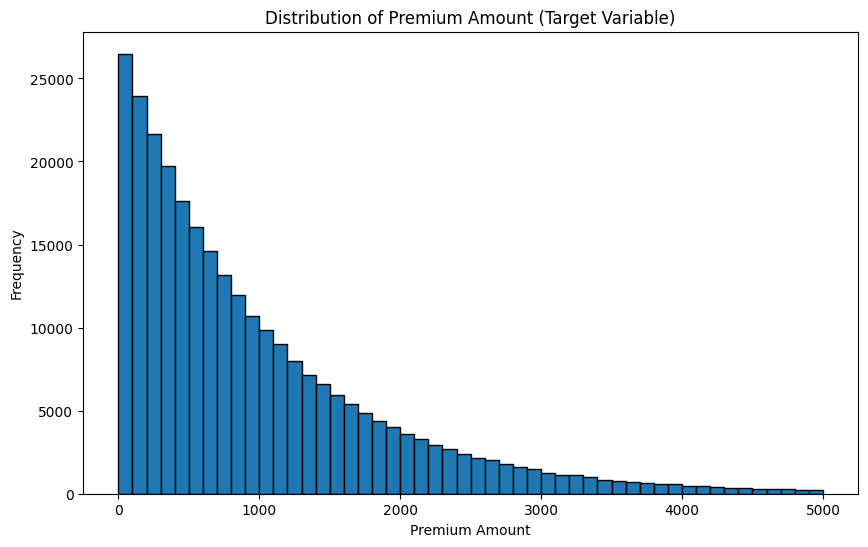

In [316]:
plt.figure(figsize=(10, 6))
plt.hist(df['Premium Amount'], bins=50, edgecolor='black')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Premium Amount (Target Variable)')
plt.show()

- Most people pay low premiums (0-1000)
- Few people pay very high premiums (3000-5000)
- Classic insurance pattern! (most customers = low risk)

In [317]:
df['Premium Amount'].mean()

np.float64(966.1355013158798)

In [318]:
df['Premium Amount'].median()

688.0

In [319]:
df['Premium Amount'].skew()

np.float64(1.5008689757132714)

###Numerical Features Distributions

In [320]:
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Credit Score',
                  'Previous Claims', 'Vehicle Age', 'Number of Dependents']

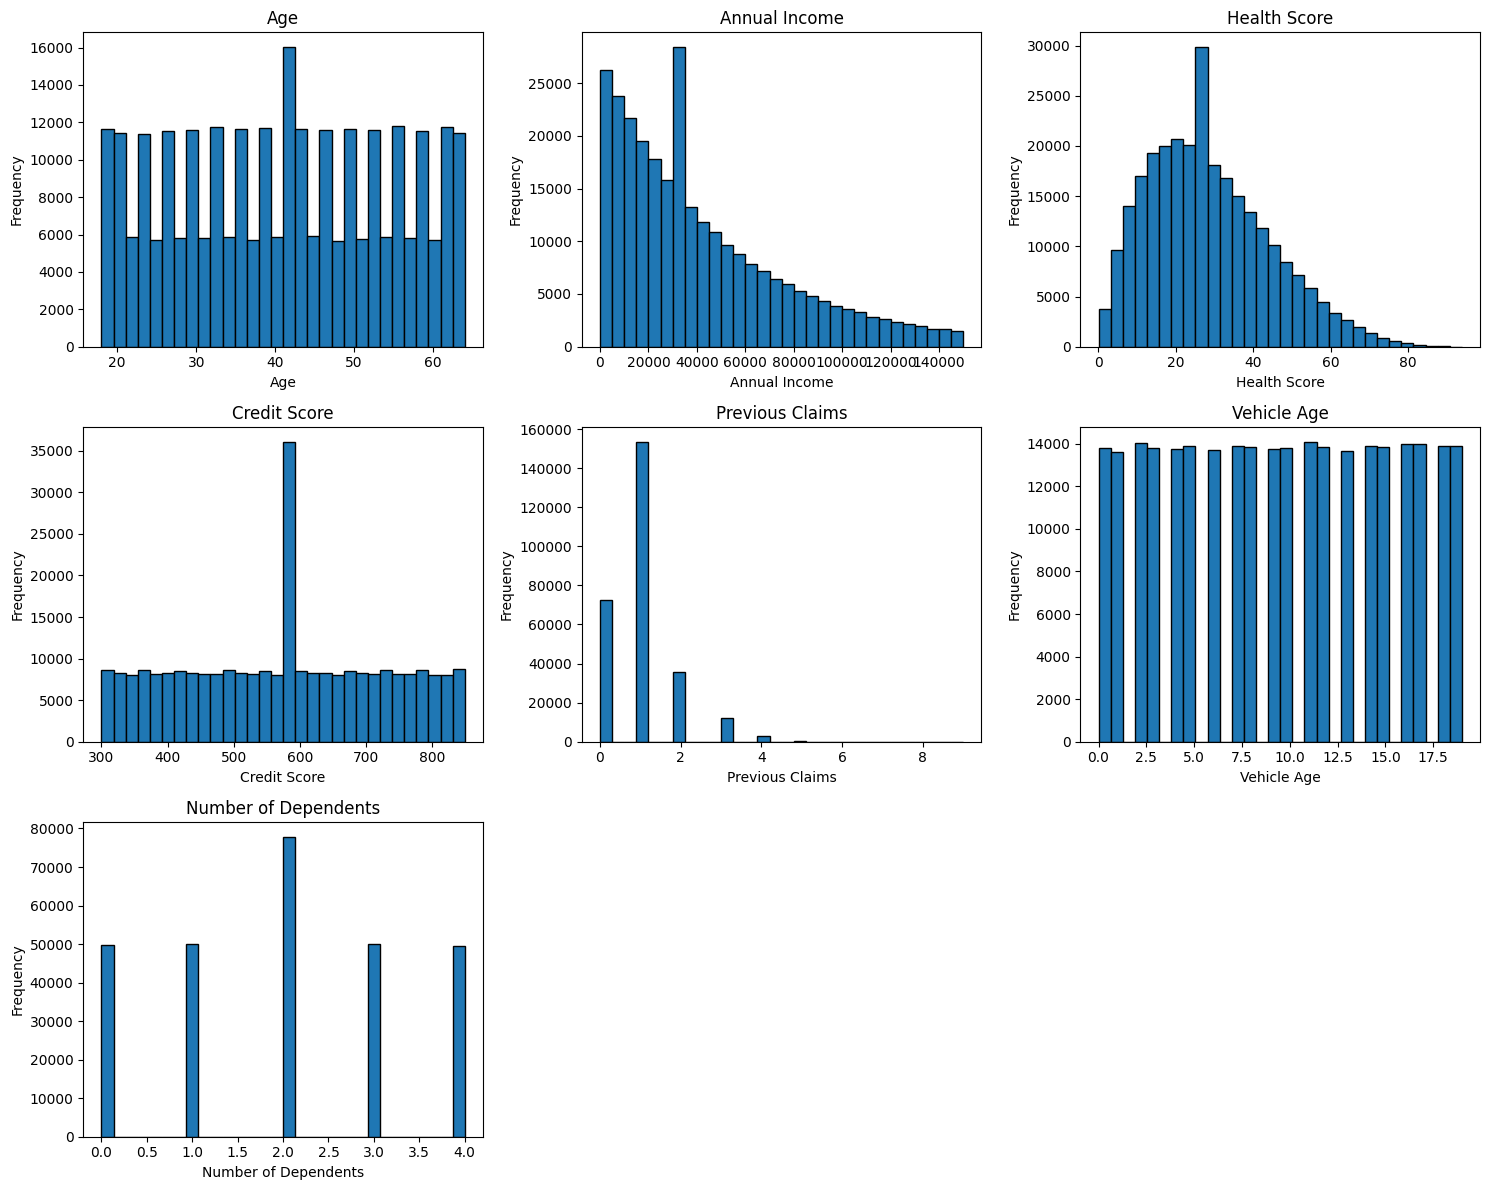

In [323]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [324]:
# Calculate correlations with Premium Amount
correlations = df[numerical_cols + ['Premium Amount']].corr()['Premium Amount'].sort_values(ascending=False)

print("Correlation with Premium Amount:")
print(correlations)

Correlation with Premium Amount:
Premium Amount          1.000000
Credit Score            0.004806
Age                     0.001847
Health Score            0.000844
Annual Income           0.000486
Vehicle Age             0.000461
Number of Dependents    0.000196
Previous Claims         0.000013
Name: Premium Amount, dtype: float64


In [325]:
# Check Premium by categorical features
categorical_cols = ['Smoking Status', 'Policy Type', 'Location', 'Occupation']

for col in categorical_cols:
    print(f"\n{col}:")
    print(df.groupby(col)['Premium Amount'].mean().sort_values(ascending=False))


Smoking Status:
Smoking Status
Yes    968.272886
No     963.990742
Name: Premium Amount, dtype: float64

Policy Type:
Policy Type
Comprehensive    967.621303
Basic            967.256921
Premium          963.543702
Name: Premium Amount, dtype: float64

Location:
Location
Urban       966.935650
Rural       966.021655
Suburban    965.454684
Name: Premium Amount, dtype: float64

Occupation:
Occupation
Unemployed       967.058502
Employed         966.218031
Self-Employed    965.870708
Unknown          965.536498
Name: Premium Amount, dtype: float64


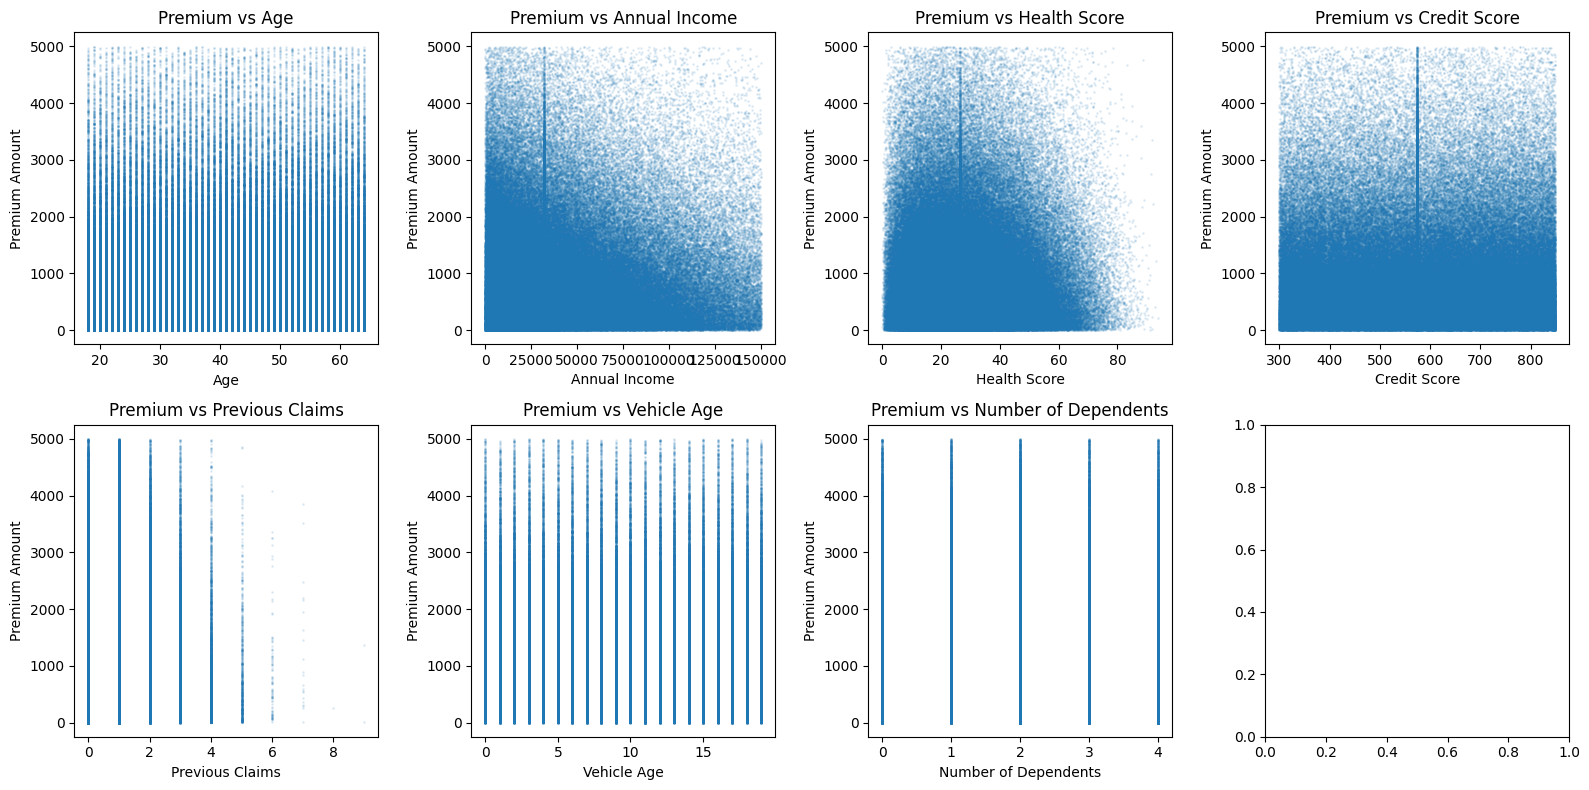

In [326]:
# Plot Premium Amount vs numerical features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].scatter(df[col], df['Premium Amount'], alpha=0.1, s=1)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Premium Amount')
    axes[i].set_title(f'Premium vs {col}')

plt.tight_layout()
plt.show()

###Boxplots

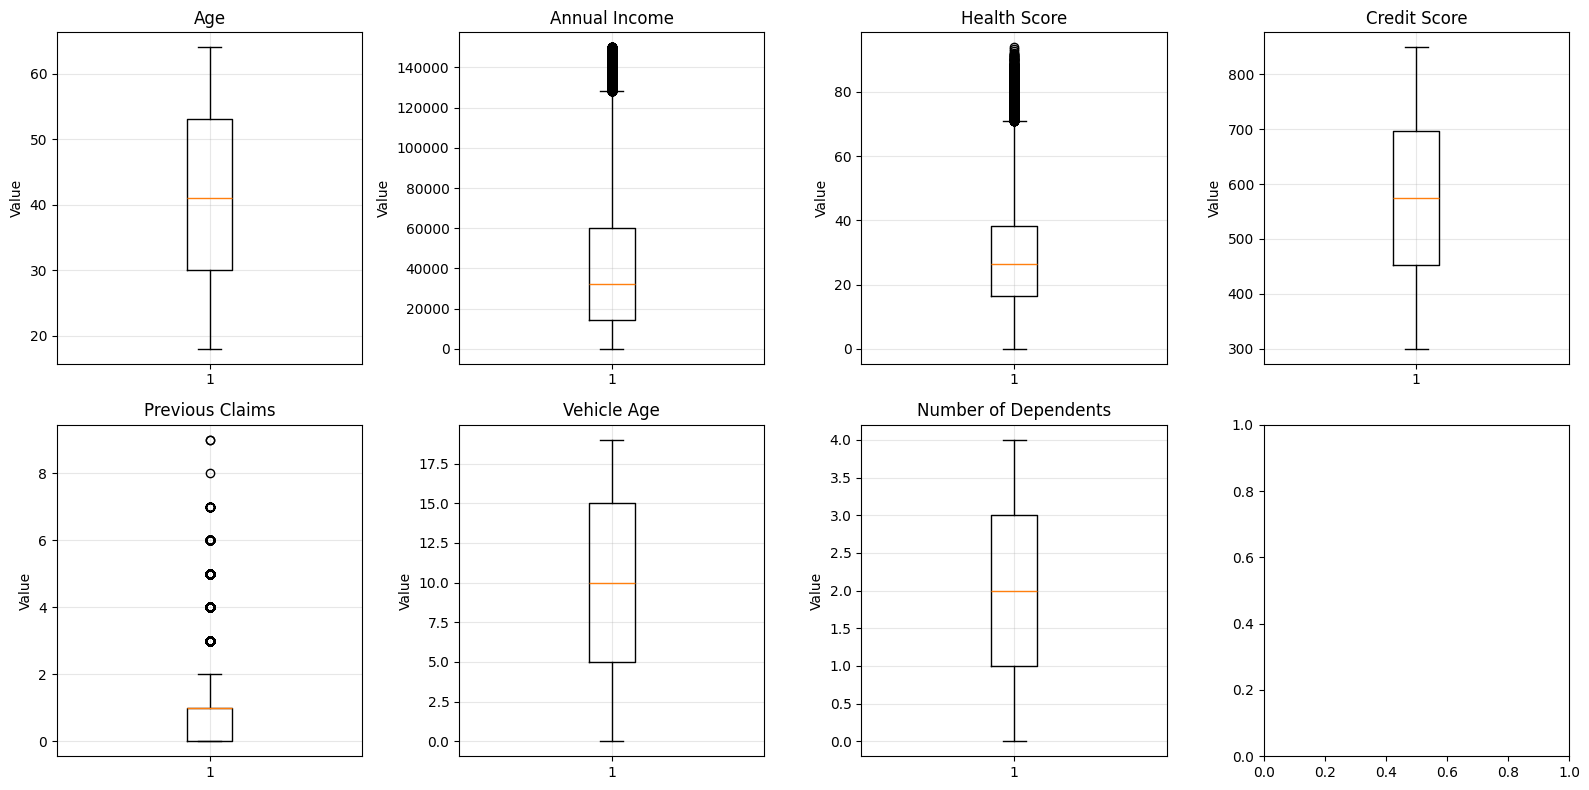

In [327]:
# Create boxplots for numerical features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [328]:
# How many people have 3+ claims (outliers)?
outlier_threshold = 3
outliers = df[df['Previous Claims'] >= outlier_threshold]

print(f"Total rows: {len(df)}")
print(f"Outliers (≥{outlier_threshold} claims): {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print()
print("Distribution of Previous Claims outliers:")
print(df[df['Previous Claims'] >= outlier_threshold]['Previous Claims'].value_counts().sort_index())

Total rows: 277001
Outliers (≥3 claims): 15758 (5.69%)

Distribution of Previous Claims outliers:
Previous Claims
3.0    11974
4.0     3044
5.0      623
6.0       93
7.0       21
8.0        1
9.0        2
Name: count, dtype: int64


- This is realistic insurance data behavior
- Only 3 people have 8-9 claims (negligible impact)
- Decision Trees will handle this naturally

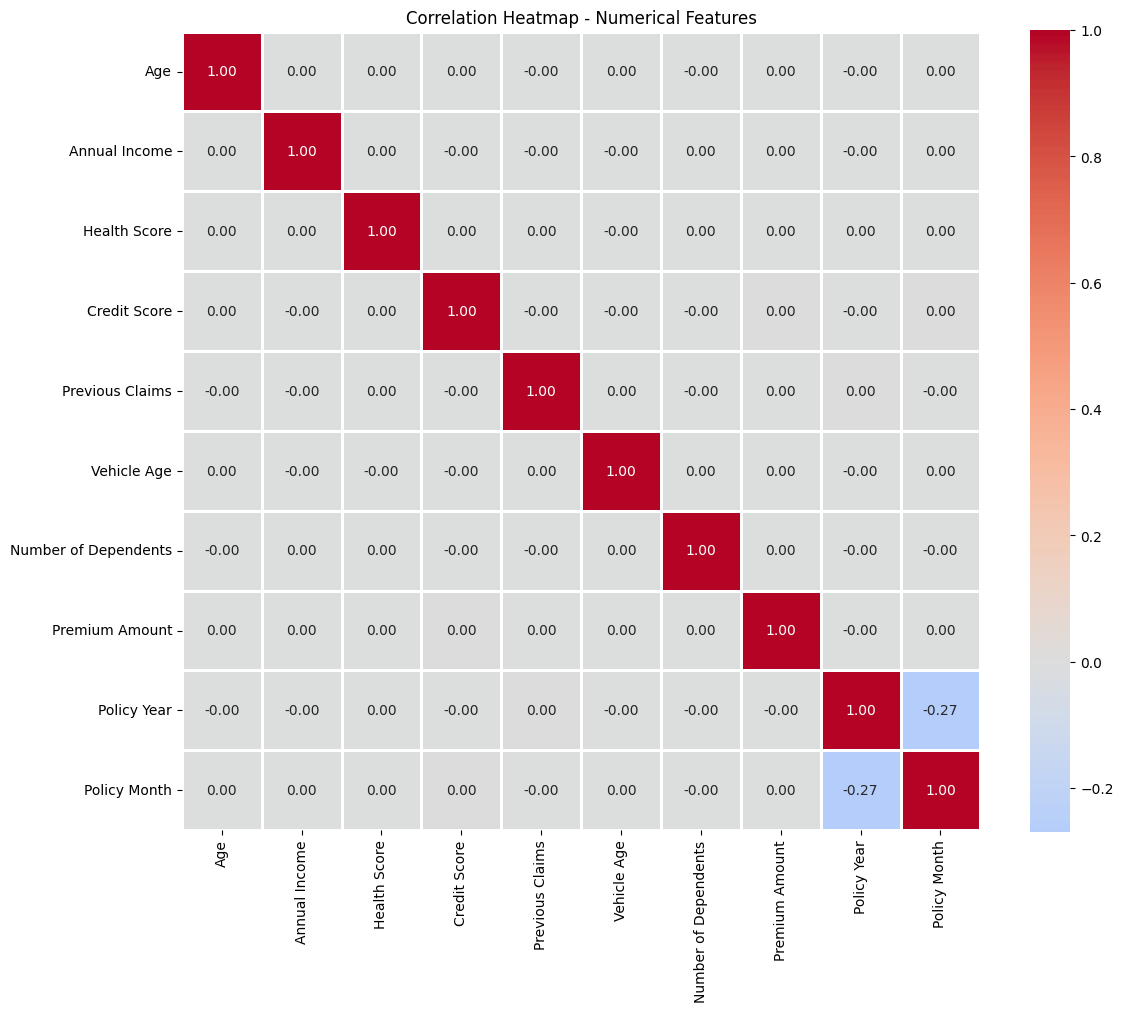

In [329]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))

# Select numerical columns including Premium Amount
corr_cols = numerical_cols + ['Premium Amount', 'Policy Year', 'Policy Month']
correlation_matrix = df[corr_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap - Numerical Features')
plt.tight_layout()
plt.show()

This synthetic dataset has RANDOM Premium Amounts??

- Realistic feature values
- Missing values (for practice)
- Skewed distributions (for practice)
- But NO relationship between features and target!